# SNOTEL Lib Demo

This notebook demonstrates how to use the `snotel_lib` to fetch and cache SNOTEL data.

In [8]:
import datetime as dt
import logging

import matplotlib.pyplot as plt

from snotel_lib import SnotelClient

logging.basicConfig(level=logging.DEBUG, force=True)


client = SnotelClient()

## 1. Fetch Metadata
This will download `all_stations.geojson` to your cache on the first run.

In [9]:
metadata = client.get_stations_metadata(force_update=True)
metadata.head()

INFO:snotel_lib.client:Fetching metadata from internet: https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/all_stations.geojson
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): raw.githubusercontent.com:443
DEBUG:urllib3.connectionpool:https://raw.githubusercontent.com:443 "GET /egagli/snotel_ccss_stations/main/all_stations.geojson HTTP/1.1" 200 68095
INFO:snotel_lib.client:Metadata retrieval took 0.32s (cache miss, 1060 stations)


,name,network,elevation_m,latitude,longitude,state,huc,mgrs,mountain_range,begin_date,end_date,csv_data,geometry
code,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2026-02-24,True,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2026-02-24,True,POINT (-112.27118 37.52217)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2026-02-24,True,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Alaska,190205051106,05VPJ,NaN,2014-08-28,2026-02-24,True,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,Washington,171100100501,10TET,Cascade Range,1994-09-01,2026-02-24,True,POINT (-121.69847 47.77957)


## 2. Fetch Station Data
Let's fetch data for a specific station, e.g., '679_WA_SNTL' (Paradise, WA, at Mount Rainier).

In [10]:
today_str = dt.datetime.now().strftime("%Y-%m-%d")
df = client.get_station_data("679_WA_SNTL", start_date="2010-10-01", end_date=today_str)
df.head()

INFO:snotel_lib.client:Retrieving data for 679_WA_SNTL from local cache: /Users/eruebush/Library/Caches/snotel_data/679_WA_SNTL.parquet
INFO:snotel_lib.client:Data retrieval for 679_WA_SNTL took 0.01s (cache hit, 5626 rows)


datetime,tavg_c,tmin_c,tmax_c,snow_depth_m,swe_m,precip_m
date,f32,f32,f32,f32,f32,f32
2010-10-01,14.6,10.7,19.799999,0.0,0.0,0.0
2010-10-02,13.5,10.3,18.200001,0.0,0.0,0.0
2010-10-03,7.1,4.1,11.9,0.0,0.0,0.0
2010-10-04,2.8,0.9,4.4,0.0,0.0,0.0
2010-10-05,5.7,-0.2,11.4,0.0,0.0,0.0


## 3. Visualize
Quick plot of Snow Water Equivalent (SWE) and Snow Depth together

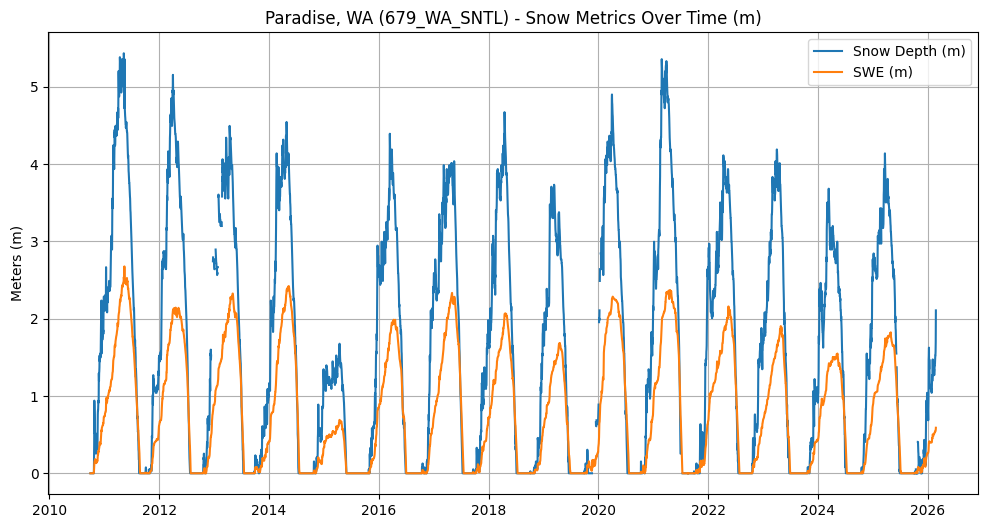

In [11]:
logging.basicConfig(level=logging.INFO, force=True)
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["snow_depth_m"], label="Snow Depth (m)")
plt.plot(df["datetime"], df["swe_m"], label="SWE (m)")

plt.title("Paradise, WA (679_WA_SNTL) - Snow Metrics Over Time (m)")
plt.ylabel("Meters (m)")
plt.grid(True)
plt.legend()
plt.show()